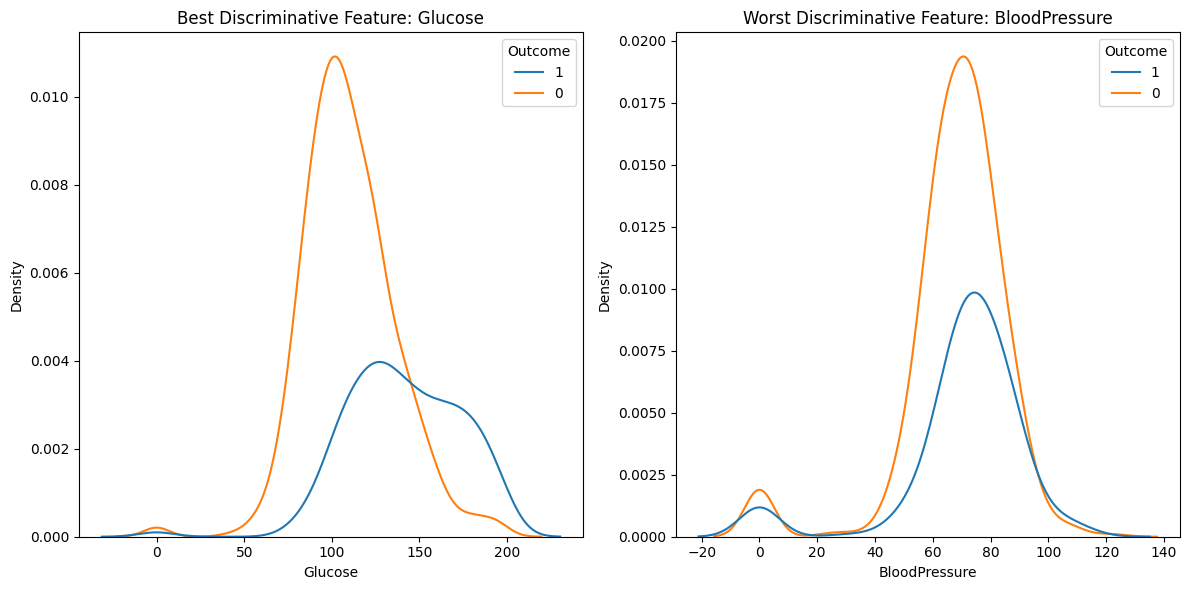

In [17]:
#Not sure what to do here :P 
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

# Load the dataset
data = loadarff('./diabetes.arff')
df = pd.DataFrame(data[0])

# Separate features and target variable
df["Outcome"] = df["Outcome"].str.decode("utf-8")
X, y = df.drop("Outcome", axis=1), df["Outcome"]

# Compute ANOVA F-values
f_values, p_values = f_classif(X, y)

# Find best and worst discriminative features
best_feature = X.columns[np.argmax(f_values)]
worst_feature = X.columns[np.argmin(f_values)]

# Plot class-conditional density plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', fill=False)
plt.title(f'Best Discriminative Feature: {best_feature}')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', fill=False)
plt.title(f'Worst Discriminative Feature: {worst_feature}')

plt.tight_layout()
plt.show()

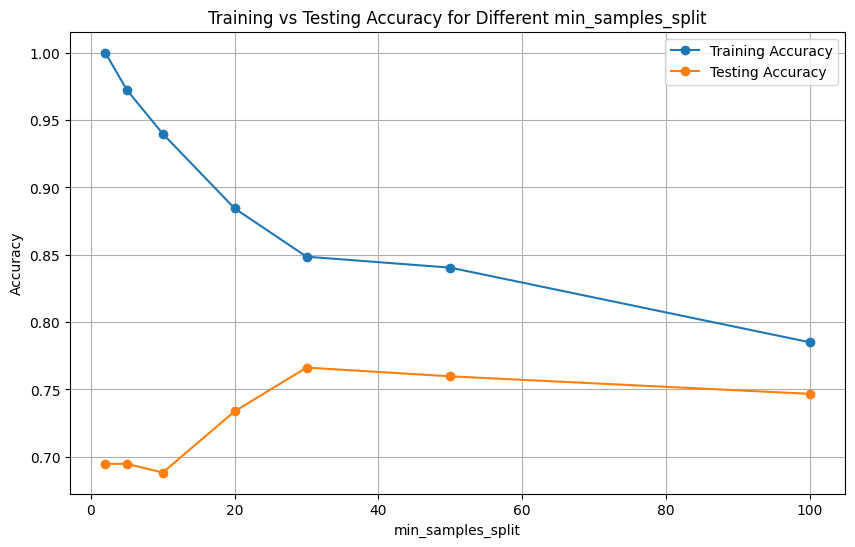

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Parameters to try for min_samples_split
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
train_acc = []
test_acc = []

for min_samples in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples, random_state=1)
    clf.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_acc, label='Training Accuracy', marker='o')
plt.plot(min_samples_splits, test_acc, label='Testing Accuracy', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing Accuracy for Different min_samples_split')
plt.grid(True)
plt.show()

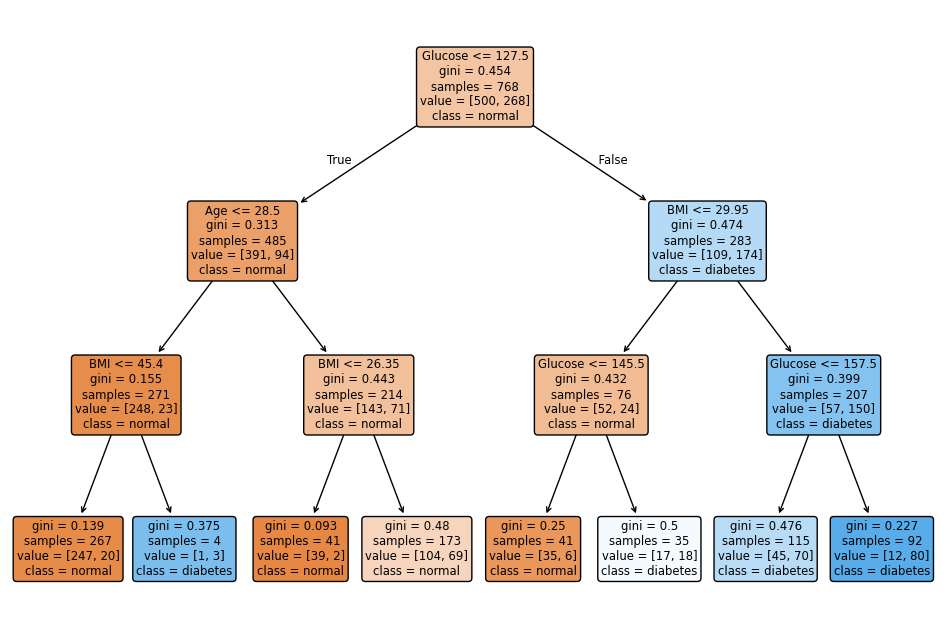

Feature Importance:
Glucose                     0.626965
BMI                         0.251854
Age                         0.121181
Pregnancies                 0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64


In [12]:
from sklearn.tree import plot_tree

# Train a decision tree with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['normal', 'diabetes'], filled=True, rounded=True)
plt.show()

# Extract feature importance and posterior probabilities
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)

# Posterior probabilities for predictions
y_prob = clf.predict_proba(X)
